# Deep learning With image

## Loading and visualizing the data

We will consider the MNIST database which contains 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. In a first time, we load the data.

In [ ]:
from tensorflow.keras.datasets import mnist,fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation,Flatten,BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, InputLayer,ReLU
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical, plot_model
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.ndimage
import numpy as np
from tensorflow.keras import backend as K

In [ ]:
def loadMNISTAsVector(subset=10000) :
    nb_classes=10
    (X_train_img, y_train_real), (X_test_img, y_test_real) = fashion_mnist.load_data()
    X_train_vect = X_train_img[:subset].reshape(subset, 784)
    X_test_vect = X_test_img.reshape(10000, 784)
    X_train_vect = X_train_vect.astype("float32")
    X_test_vect = X_test_vect.astype("float32")
    X_train_vect /= 255
    X_test_vect /= 255
    y_train_cat = to_categorical(y_train_real[:subset], nb_classes)
    y_test_cat = to_categorical(y_test_real, nb_classes)
    return (X_train_vect, y_train_cat), (X_test_vect, y_test_cat)



(X_train_vect, y_train_cat), (X_test_vect, y_test_cat) =loadMNISTAsVector(subset=50000)


4422102/4422102 [==============================] - 0s 0us/step


Ploting the data
   

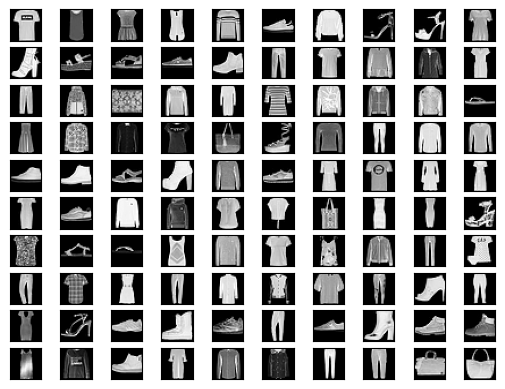

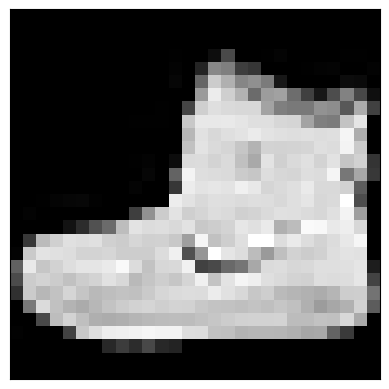

In [ ]:
def plot_10_by_10_images(images):
    """ Plot 100 MNIST images in a 10 by 10 table. Note that we crop
    the images so that they appear reasonably close together.  The
    image is post-processed to give the appearance of being continued."""
    fig = plt.figure()
    #image = np.concatenate(images, axis=1)
    for x in range(10):
        for y in range(10):
            ax = fig.add_subplot(10, 10, 10*y+x+1)
            plt.imshow(images[10*y+x+1].reshape(28, 28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
    plt.show()

def plot_mnist_digit(image):
    """ Plot a single MNIST image."""
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.imshow(image.reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.show()



plot_10_by_10_images(X_train_vect)

plot_mnist_digit(X_train_vect[0])

Print the shape of the data, the miminum, the maximum and comment them.

In [ ]:
X_train_vect.shape, X_test_vect.shape


((50000, 784), (10000, 784))

In [ ]:
y_train_cat.shape, y_train_cat.shape #10 classes

((50000, 10), (50000, 10))

In [ ]:
print(X_train_vect.min(), X_train_vect.max())  #values between 0 and 1

0.0 1.0


## Learning the network

The next task is to build the network.

In the learn model function, the neural networks shape is obtained by using the keras functions :
* __model.add(InputLayer(shape=(nbinput,)))__ : which adds an yhe imput layer to the network. [input_shape=(nbinput,)] corresponds to the shape of the input data
* __model.add(Dense(nbhiden, [activation='activationfunction']))__ : which adds an hidden layer to the network. nbhidden is the number of hidden nodes.  [activation='activationfunction'] is the activation function of the layer
* __model.add(Dropout(value))__ : apply dropout to the layer (to avoid overfitting)
* __model.add(BatchNormalization())__: apply batch normalization to the layer (to avoid overfitting)

The possible activation fonctions are :
* Relu
* Sigmoid
* softmax (for the slast layer of a multiclass classifier)

The possible loss functions are
* binary_crossentropy (for binary classification)
* categorical_cross_entropy (for multi class classification)
* mean_squared_error (for regression)


Here is the simplest network you can build :

In [ ]:
def getSimplePerceptron(nb_classes=10):
    model = Sequential()
    model.add(InputLayer(input_shape=(784)))

    #model.add(Dense(1, activation='linear'))
    #model.add(ReLU())
    layers = [2048, 2048]
    for l in layers:
      model.add(Dense(l,activation="linear"))
      model.add(BatchNormalization())
      model.add(ReLU())
      model.add(Dropout(0.75))

    model.add(Dense(nb_classes, activation='softmax'))

    opt = Adam(lr= 0.0001)
    model.compile(loss='categorical_crossentropy',metrics=['accuracy'],  optimizer=opt)
    return model

model=getSimplePerceptron()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2048)              1607680   
                                                                 
 batch_normalization (Batch  (None, 2048)              8192      
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 2048)              0         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 2048)              4196352   
                                                                 
 batch_normalization_1 (Bat  (None, 2048)              8192      
 chNormalization)                                       

\__Question__: Describe the neural networks and exaplain the computation of the number of parameters of your network

The Neural Network above is composed of three types of layers;
- first layer represent the input layer which takes the input features (784).
- second we have 2 hidden layers of 2048 units.
- third we have the output layer (Dense) with 10 units (10 classes).

The number of parameters is computed by the total number of weights + the total number of biases. The total number of weights equals the sum of the products of each pair of adjacent layers. The total number of biases is equal to the number of hidden neurons + the number of output neurons.

* total_weights = (784 * 2048)+ (2048 *2048)+ (2048 * 10)
* total_biases = 2048 + 2048 + 10
* total_parameters = 5832714

Then, we learn the parameters of the network

In [ ]:
(X_train_vect, y_train_cat), (X_test_vect, y_test_cat) =loadMNISTAsVector()
model=getSimplePerceptron()
batch_size = 64
epochs=25
res = model.fit(X_train_vect, y_train_cat, batch_size=batch_size, epochs=epochs,  verbose=1, validation_data=(X_test_vect, y_test_cat))

Epoch 1/25
157/157 [==============================] - 29s 170ms/step - loss: 1.1244 - accuracy: 0.6730 - val_loss: 0.6662 - val_accuracy: 0.7771
Epoch 2/25
157/157 [==============================] - 27s 172ms/step - loss: 0.8122 - accuracy: 0.7422 - val_loss: 0.7727 - val_accuracy: 0.7839
Epoch 3/25
157/157 [==============================] - 26s 163ms/step - loss: 0.7029 - accuracy: 0.7671 - val_loss: 0.5896 - val_accuracy: 0.8078
Epoch 4/25
157/157 [==============================] - 25s 157ms/step - loss: 0.6337 - accuracy: 0.7890 - val_loss: 0.5220 - val_accuracy: 0.8214
Epoch 5/25
157/157 [==============================] - 23s 147ms/step - loss: 0.6042 - accuracy: 0.7998 - val_loss: 0.5255 - val_accuracy: 0.8269
Epoch 6/25
157/157 [==============================] - 25s 157ms/step - loss: 0.5570 - accuracy: 0.8032 - val_loss: 0.4782 - val_accuracy: 0.8357
Epoch 7/25
157/157 [==============================] - 25s 156ms/step - loss: 0.5354 - accuracy: 0.8101 - val_loss: 0.5140 - val_ac

## Evaluate Performance

Plot the train/test curve of the loss and accuracy

Best test accuracy was 0.852600 at epoch 20


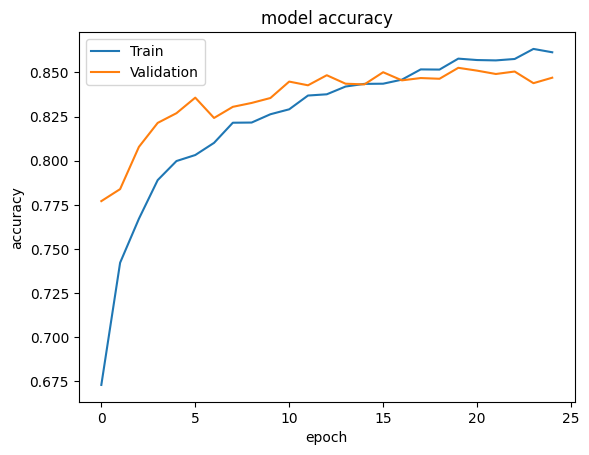

In [ ]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(res.history['accuracy'])
plt.plot(res.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')



best_score = max(res.history['val_accuracy'])
best_epoch = np.array(res.history['val_accuracy']).argmax()+1
print('Best test accuracy was %f at epoch %i' % (best_score, best_epoch))



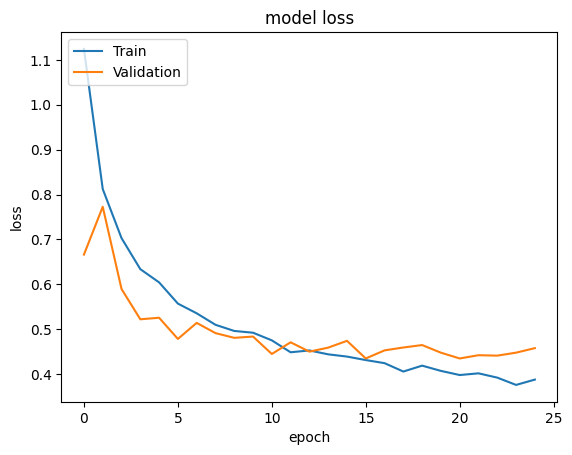

In [ ]:
plt# summarize history for loss
plt.plot(res.history['loss'])
plt.plot(res.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Last, we analyse the results :

In [ ]:
loss,acc = model.evaluate(X_test_vect, y_test_cat,  verbose=0)
index=800
print('The accuracy on the test set is ',(acc*100),'%')

The accuracy on the test set is  84.7000002861023 %


Predict the probabilty distribution on the classes for one image with the function predict and find the most probable class

In [ ]:
np.where(y_test_cat[0] == 1)[0][0]  #let's check if the model find the class of the first item

9

In [ ]:
y_pred = model.predict(X_test_vect)
y_pred[0]

313/313 [==============================] - 4s 13ms/step


array([1.0174766e-07, 2.0000863e-08, 1.4973763e-07, 8.5177891e-07,
       7.8350655e-07, 1.7304538e-02, 5.4004471e-07, 1.4033101e-02,
       4.1368166e-06, 9.6865571e-01], dtype=float32)

In [ ]:
np.where(y_pred[0]==y_pred[0].max())[0][0]  #find the index of the max value (most probable class)
# the model predicted correctely the class of first item

9

__Questions__ :
* Propose and apply your own neural networks. Try to achieve the best results as possible with the smallest network possible

## CNN

We will now consider a new kind of network that consider image directly. We load the data as matrix instead of vectors

In [ ]:
def loadMNISTAsMaxtrix(subset=10000) :
    nb_classes=10
    img_rows, img_cols = 28, 28
    (X_train_img, y_train_real), (X_test_img, y_test_real) = fashion_mnist.load_data()
    X_train_mat = X_train_img[:subset].reshape(X_train_img[:subset].shape[0], img_rows, img_cols, 1)
    X_test_mat = X_test_img.reshape(X_test_img.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    X_train_mat = X_train_mat.astype('float32')
    X_test_mat = X_test_mat.astype('float32')
    X_train_mat /= 255
    X_test_mat /= 255
    y_train_cat = to_categorical(y_train_real[:subset], nb_classes)
    y_test_cat = to_categorical(y_test_real, nb_classes)
    return (X_train_mat, y_train_cat), (X_test_mat, y_test_cat)


Compare the shape of the data with the previous approach

In [ ]:
(X_train_mat, y_train_cat), (X_test_mat, y_test_cat) =loadMNISTAsMaxtrix(subset=50000)
nb_classes=10

X_train_mat.shape

(50000, 28, 28, 1)

Print the shape of the data and comment it.

The next task is to build the convolutional neural network (CNN).
In the learn model function, the CNN shape is obtained by using these additional keras functions :
* __model.add(InputLayer(shape=(nbinput,)))__ : which adds an yhe imput layer to the network. [input_shape=(nbinput,)] corresponds to the shape of the input data
* __model.add(Conv2D(nbhiden, [kernel_size=(3, 3)], [padding='same'], [activation='activationfunction']))__ : which adds an convolution hidden layer to the network. nbhidden is the number of hidden nodes.  [kernel_size=(3, 3)] the size of the convolutional kernel and [padding='same'] the way the border of the images are handled
* __model.add(MaxPooling2D(pool_size=(2, 2))__ : pooling operation

Here is one the simplest CNN you can build :

In [ ]:


def getCNN(nb_classes=10):
    model = Sequential()
    model.add(InputLayer(input_shape=(28,28,1)))

    #matrix 28x28

    for l in [64, 128, 256]:
      for m in range(3):
        model.add(Conv2D(l, kernel_size=(3, 3), padding='same', activation= 'linear'))     #add convolution layer
        model.add(BatchNormalization()) #add a BatchNormalization
        model.add(ReLU()) #add a relu function
      model.add(MaxPooling2D(pool_size=(2, 2)))  ##pooling


    #transform image to vectors of neurons
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(nb_classes, activation='softmax'))

    opt = Adam(0.0001)
    model.compile(loss='categorical_crossentropy',metrics=['accuracy'],  optimizer=opt)
    return model


model=getCNN(nb_classes=10)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 batch_normalization_4 (Bat  (None, 28, 28, 64)        256       
 chNormalization)                                                
                                                                 
 re_lu_4 (ReLU)              (None, 28, 28, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 batch_normalization_5 (Bat  (None, 28, 28, 64)        256       
 chNormalization)                                                
                                                                 
 re_lu_5 (ReLU)              (None, 28, 28, 64)       

In [ ]:
batch_size = 256
epochs=20
cnn = model.fit(X_train_mat, y_train_cat, batch_size=batch_size, epochs=epochs,  verbose=1, validation_data=(X_test_mat, y_test_cat))

Epoch 1/20
 11/196 [>.............................] - ETA: 24:22 - loss: 1.5299 - accuracy: 0.5167

__Questions__ : As for the dense networks, do the following analysis :
* Plot the train/test curve of the loss and accuracy
* Compute the final accuracy on the test set
* Predict the probabilty distribution on the classes for one image with the function predict and find the most probable class


In [ ]:
loss,acc = model.evaluate(X_test_mat, y_test_cat,  verbose=0)
index=800
print('The accuracy on the test set is ',(acc*100),'%')

In [ ]:
model.predict(X_test_mat)

In [ ]:
plt.plot(cnn.history['accuracy'])
plt.plot(cnn.history['val_accuracy'])

In [ ]:
plt.plot(cnn.history['loss'])
plt.plot(cnn.history['val_loss'])

In [ ]:
y_predictions = model.predict(X_test_mat)

In [ ]:
y_predictions[0]

__Questions__ :
* Propose and apply your own convolutional neural networks. Try to achieve the best results as possible.
* Draw a schema of your CNN (with the description of each layers)
* Describe the computation of the number of parameters of your network

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
!pip install visualkeras

In [ ]:
from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, ZeroPadding2D
from collections import defaultdict



In [ ]:

import visualkeras
from tensorflow.keras import layers
from collections import defaultdict
color_map = defaultdict(dict)
color_map[layers.Conv2D]['fill'] = 'orange'
color_map[layers.MaxPooling2D]['fill'] = 'pink'
color_map[layers.BatchNormalization]['fill'] = '#03045e'
color_map[layers.Dense]['fill'] = '#fb5607'
color_map[layers.Flatten]['fill'] = 'green'
visualkeras.layered_view(model, legend=True,color_map=color_map)



__Questions__ : Compare the results of the two types of networks with respect to their performances and their number of parameters. Use bar plot to compare the different models you applied

__Questions__ : use the Xplique package to visualize the most important pixel for a decision :
* Install the package : pip install xplique
* Make a saliency map explainer of the model
* compute the explanation of the 5 five example of the test set and plot them with plot_attributions
* test with other attribution methods

You can find example here :
* the [github page of Xplique](https://github.com/deel-ai/xplique)
* Attribution method [tutorial](https://colab.research.google.com/drive/1XproaVxXjO9nrBSyyy7BuKJ1vy21iHs2)

In [ ]:
!pip install xplique

In [ ]:
import xplique
from xplique.plots import plot_attributions

In [ ]:
y_test_cat[:5]

In [ ]:
from xplique.attributions import (Saliency, GradientInput, IntegratedGradients, SmoothGrad, VarGrad,
                                  SquareGrad, GradCAM, Occlusion, Rise, GuidedBackprop,
                                  GradCAMPP, Lime, KernelShap, SobolAttributionMethod)

import tensorflow.keras.applications as app
batch_size = 64
explainers = [
             Saliency(model),
             GradientInput(model),
             GuidedBackprop(model),
             IntegratedGradients(model, steps=80, batch_size=batch_size),
             SmoothGrad(model, nb_samples=80, batch_size=batch_size),
             SquareGrad(model, nb_samples=80, batch_size=batch_size),
             VarGrad(model, nb_samples=80, batch_size=batch_size),
             GradCAM(model),
             Occlusion(model, patch_size=10, patch_stride=5, batch_size=batch_size),
             Rise(model, nb_samples=4000, batch_size=batch_size),
             SobolAttributionMethod(model, batch_size=batch_size)
             # Lime(model, nb_samples = 1000),
             # KernelShap(model, nb_samples = 1000)
]


for explainer in explainers:

  explanations = explainer(X_test_mat, y_test_cat) # `explainer.explain(inputs, labels)` also works
  X=  X_test_mat[:5]

  print(f"Method: {explainer.__class__.__name__}")
  plot_attributions(explanations, X_test_mat, img_size=2., cmap='jet', alpha=0.4,
                    cols=len(X_test_mat), absolute_value=True, clip_percentile=0.5)
  plt.show()
  print("\n")